In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model Building

### Get the cleaned and pivotted files for each measure category
### Apply weights (multiply by 22 or 4 as per deloite case study
### Merge the Data frames on provider id 
### Get the target variable from Hospital General Information file - 'Hospital Overall Rating'
### Apply Quantile transformer to normalize the data 
### Apply RFE and Build Liniear model

In [2]:
df1=pd.read_csv("Efficiency_score_supervised_model.csv")
df2=pd.read_csv("Mortality_supervised_model.csv")
df3=pd.read_csv("Readmission_supervised_model.csv")
df4=pd.read_csv("Patient_exp_score_supervised_model.csv")
df5=pd.read_csv("SafetyOfCare_supervised_model.csv")
df6=pd.read_csv("EffectivenessOfCare_supervised_model.csv")
df7=pd.read_csv("TimelinessOfCare_supervised_model.csv")

In [3]:
df1.head(1)


Unnamed: 0  Provider ID  OP_10  OP_11  OP_13  OP_14   OP_8  \
0           0        10001  4.224  0.261 -0.071 -0.048  3.048   

   Efficiency_score  
0            1.4828

In [4]:
df2.head(1)

Unnamed: 0  Provider ID  MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  \
0           0        10001        1.625          0.42         1.581   

   MORT_30_HF  MORT_30_PN  MORT_30_STK  PSI_4_SURG_COMP  Mort_score  
0        2.48        2.79        2.156          13.4608    3.501829

In [5]:
df3.head(1)

Unnamed: 0  Provider ID  READM_30_AMI  READM_30_CABG  READM_30_COPD  \
0           0        10001          1.98          0.906          2.743   

   READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  READM_30_PN  \
0        2.996              0.459               3.234        2.618   

   READM_30_STK  Readmission_score  
0         1.524             2.0575

In [6]:
df4.head(1)

Unnamed: 0  Provider ID  H_CLEAN_STAR_RATING  H_COMP_1_STAR_RATING  \
0           0        10001                 0.18                   0.3   

   H_COMP_2_STAR_RATING  H_COMP_3_STAR_RATING  H_COMP_4_STAR_RATING  \
0                  0.24                  0.18                  0.27   

   H_COMP_5_STAR_RATING  H_COMP_6_STAR_RATING  H_COMP_7_STAR_RATING  \
0                  0.27                  0.24                   0.3   

   H_HSP_RATING_STAR_RATING  H_QUIET_STAR_RATING  H_RECMND_STAR_RATING  \
0                       0.4                 0.32                   0.4   

   Patent_exp_score  
0          0.281818

In [7]:
df5.head(1)

Unnamed: 0  Provider ID  HAI_1_SIR  HAI_2_SIR  HAI_3_SIR  HAI_4_SIR  \
0           0        10001     0.0696    0.11416     0.1122        0.0   

   HAI_5_SIR  COMP_HIP_KNEE  PSI_90_SAFETY  SafetyOfCare_score  
0    0.00422          0.456          0.442            0.149773

In [8]:
df6.head(1)

Unnamed: 0  Provider ID  CAC_3  IMM_2  IMM_3_OP_27_FAC_ADHPCT  OP_22  \
0           0        10001    0.0   4.85                    1.62   0.12   

   OP_23  OP_29  OP_30  OP_4            ...              STK_1  STK_4  STK_6  \
0    0.0    0.0    4.1   0.0            ...               6.93   5.36   4.95   

   STK_8  VTE_1  VTE_2  VTE_3  VTE_5  VTE_6  EffectivenessOfCare_score  
0   5.22   6.79   7.92   6.37    6.3    0.0                   3.362778  

[1 rows x 21 columns]

In [9]:
df7.head(1)

Unnamed: 0  Provider ID  ED_1b  ED_2b  OP_18b  OP_20  OP_21  OP_3b  OP_5  \
0           0        10001  61.87  14.28    39.2    9.1  11.88    0.0   0.0   

   TimelinessOfCare_score  
0               19.475714

In [10]:
df1=df1.drop('Unnamed: 0',axis=1)
df2=df2.drop('Unnamed: 0',axis=1)
df3=df3.drop('Unnamed: 0',axis=1)
df4=df4.drop('Unnamed: 0',axis=1)
df5=df5.drop('Unnamed: 0',axis=1)
df6=df6.drop('Unnamed: 0',axis=1)
df7=df7.drop('Unnamed: 0',axis=1)

In [11]:
df1.iloc[:,1:] = df1.iloc[:,1:] * 4
df1.head()

Provider ID   OP_10   OP_11  OP_13  OP_14    OP_8  Efficiency_score
0        10001  16.896   1.044 -0.284 -0.192  12.192            5.9312
1        10005  35.112  11.832 -0.212 -0.320  13.696           12.0216
2        10006  31.152   5.336 -0.000 -0.368  14.592           10.1424
3        10007  64.152   7.076 -0.000 -0.000   0.000           14.2456
4        10008   9.504   0.000 -0.000 -0.048   0.000            1.8912

In [12]:
df2.iloc[:,1:] = df2.iloc[:,1:] * 22
df2.head()

Provider ID  MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  \
0        10001       35.750          9.24        34.782       54.56   
1        10005       45.760          0.00        28.424       68.20   
2        10006       47.762          9.02        26.554       68.64   
3        10007        0.000          0.00        34.782       63.36   
4        10008        0.000          0.00        30.668       55.88   

   MORT_30_PN  MORT_30_STK  PSI_4_SURG_COMP  Mort_score  
0      61.380       47.432         296.1376   77.040229  
1      82.368       47.740         315.1280   83.945714  
2      72.072       55.132         349.0608   89.748686  
3      74.448       51.128           0.0000   31.959714  
4      62.172        0.000           0.0000   21.245714

In [13]:
df3.iloc[:,1:] = df3.iloc[:,1:] * 22
df3.head()

Provider ID  READM_30_AMI  READM_30_CABG  READM_30_COPD  READM_30_HF  \
0        10001        43.560         19.932         60.346       65.912   
1        10005        44.088          0.000         51.480       67.452   
2        10006        42.504         20.064         56.628       63.448   
3        10007         0.000          0.000         56.914       64.988   
4        10008         0.000          0.000         54.912       71.148   

   READM_30_HIP_KNEE  READM_30_HOSP_WIDE  READM_30_PN  READM_30_STK  \
0             10.098              71.148       57.596        33.528   
1             11.286              68.838       50.512        35.376   
2              9.900              71.148       55.132        31.680   
3              0.000              76.692       53.284        33.528   
4              0.000              72.534       49.280         0.000   

   Readmission_score  
0           45.26500  
1           41.12900  
2           43.81300  
3           35.67575  
4           30.98425

In [14]:
df4.iloc[:,1:] = df4.iloc[:,1:] * 22
df4.head()

Provider ID  H_CLEAN_STAR_RATING  H_COMP_1_STAR_RATING  \
0        10001                 3.96                   6.6   
1        10005                 3.96                   6.6   
2        10006                 3.96                   6.6   
3        10007                 5.94                   6.6   
4        10011                 1.98                   6.6   

   H_COMP_2_STAR_RATING  H_COMP_3_STAR_RATING  H_COMP_4_STAR_RATING  \
0                  5.28                  3.96                  5.94   
1                  7.04                  5.94                  5.94   
2                  7.04                  5.94                  5.94   
3                  8.80                  7.92                  7.92   
4                  5.28                  3.96                  5.94   

   H_COMP_5_STAR_RATING  H_COMP_6_STAR_RATING  H_COMP_7_STAR_RATING  \
0                  5.94                  5.28                   6.6   
1                  5.94                  7.04                   4.4   
2                  5.94                  3.52                   4.4   
3                  7.92                  5.28                   6.6   
4                  3.96                  5.28                   4.4   

   H_HSP_RATING_STAR_RATING  H_QUIET_STAR_RATING  H_RECMND_STAR_RATING  \
0                       8.8                 7.04                   8.8   
1                       8.8                 7.04                   6.6   
2                       4.4                 7.04                   4.4   
3                       6.6                 8.80                   6.6   
4                       6.6                 5.28                   6.6   

   Patent_exp_score  
0              6.20  
1              6.30  
2              5.38  
3              7.18  
4              5.08

In [15]:
df5.iloc[:,1:] = df5.iloc[:,1:] * 22
df5.head()

Provider ID  HAI_1_SIR  HAI_2_SIR  HAI_3_SIR  HAI_4_SIR  HAI_5_SIR  \
0        10001    1.53120    2.51152    2.46840        0.0    0.09284   
1        10005    0.93456    0.80256    0.50952        0.0    0.30536   
2        10006    0.30008    1.12816    0.40920        0.0    0.27742   
3        10007    0.00000    0.00000    0.00000        0.0    0.00000   
4        10008    0.00000    0.00000    0.00000        0.0    0.00000   

   COMP_HIP_KNEE  PSI_90_SAFETY  SafetyOfCare_score  
0         10.032          9.724            3.294995  
1          7.920         12.155            2.828375  
2         10.032         13.013            3.144982  
3          0.000         11.297            1.412125  
4          0.000         12.870            1.608750

In [16]:
df6.iloc[:,1:] = df6.iloc[:,1:] * 4
df6.head()

Provider ID  CAC_3  IMM_2  IMM_3_OP_27_FAC_ADHPCT  OP_22  OP_23  OP_29  \
0        10001    0.0   19.4                    6.48   0.48    0.0   0.00   
1        10005    0.0   19.8                    6.64   0.24   17.2  14.72   
2        10006    0.0   20.0                    6.96   0.12    0.0  11.20   
3        10007    0.0   19.8                    4.24   0.12    0.0   0.00   
4        10008    0.0   19.0                    3.44   0.12    0.0  15.36   

   OP_30  OP_4  PC_01  STK_1  STK_4  STK_6  STK_8  VTE_1  VTE_2  VTE_3  VTE_5  \
0   16.4   0.0   0.00  27.72  21.44   19.8  20.88  27.16  31.68  25.48  25.20   
1   18.4  19.8   0.12  27.44   0.00   17.6  24.00  26.60  30.08  28.00  28.00   
2   17.6   0.0   0.00  27.72   0.00   19.4  21.60  27.44  28.48  24.08  25.76   
3    0.0  17.8   0.00  22.40   0.00   14.2   0.00  27.16  31.68   0.00   0.00   
4   19.4   0.0   0.00   0.00   0.00    0.0   0.00  27.72   0.00   0.00   0.00   

   VTE_6  EffectivenessOfCare_score  
0    0.0                  13.451111  
1    0.0                  15.480000  
2    0.0                  12.797778  
3    0.0                   7.633333  
4    0.0                   4.724444

In [17]:
df6=df6.rename(columns={"TimelinessOfCare_score":"EffectivenessOfCare_score"})
df6.head()

Provider ID  CAC_3  IMM_2  IMM_3_OP_27_FAC_ADHPCT  OP_22  OP_23  OP_29  \
0        10001    0.0   19.4                    6.48   0.48    0.0   0.00   
1        10005    0.0   19.8                    6.64   0.24   17.2  14.72   
2        10006    0.0   20.0                    6.96   0.12    0.0  11.20   
3        10007    0.0   19.8                    4.24   0.12    0.0   0.00   
4        10008    0.0   19.0                    3.44   0.12    0.0  15.36   

   OP_30  OP_4  PC_01  STK_1  STK_4  STK_6  STK_8  VTE_1  VTE_2  VTE_3  VTE_5  \
0   16.4   0.0   0.00  27.72  21.44   19.8  20.88  27.16  31.68  25.48  25.20   
1   18.4  19.8   0.12  27.44   0.00   17.6  24.00  26.60  30.08  28.00  28.00   
2   17.6   0.0   0.00  27.72   0.00   19.4  21.60  27.44  28.48  24.08  25.76   
3    0.0  17.8   0.00  22.40   0.00   14.2   0.00  27.16  31.68   0.00   0.00   
4   19.4   0.0   0.00   0.00   0.00    0.0   0.00  27.72   0.00   0.00   0.00   

   VTE_6  EffectivenessOfCare_score  
0    0.0                  13.451111  
1    0.0                  15.480000  
2    0.0                  12.797778  
3    0.0                   7.633333  
4    0.0                   4.724444

In [18]:
df7.iloc[:,1:] = df7.iloc[:,1:] * 4
df7.head()

Provider ID   ED_1b  ED_2b  OP_18b  OP_20  OP_21  OP_3b  OP_5  \
0        10001  247.48  57.12   156.8  36.40  47.52    0.0   0.0   
1        10005  223.56  59.64    93.6  15.12  28.80    0.0   2.4   
2        10006  199.64  65.52   106.4   5.60  27.84    0.0   0.0   
3        10007  201.48  57.12    95.2  21.28  43.20    0.0   1.4   
4        10008  165.60  47.04    78.4  15.12  23.52    0.0   0.0   

   TimelinessOfCare_score  
0               77.902857  
1               60.445714  
2               57.857143  
3               59.954286  
4               47.097143

In [19]:
df= pd.merge(df1, df2, on='Provider ID', how='outer')

In [20]:
df= pd.merge(df, df3, on='Provider ID', how='outer')

In [21]:
df= pd.merge(df, df4, on='Provider ID', how='outer')

In [22]:
df= pd.merge(df, df5, on='Provider ID', how='outer')

In [23]:
df= pd.merge(df, df6, on='Provider ID', how='outer')

In [24]:
df= pd.merge(df, df7, on='Provider ID', how='outer')

In [25]:
df.shape

(4599, 71)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4599 entries, 0 to 4598
Data columns (total 71 columns):
Provider ID                  4599 non-null int64
OP_10                        3779 non-null float64
OP_11                        3779 non-null float64
OP_13                        3779 non-null float64
OP_14                        3779 non-null float64
OP_8                         3779 non-null float64
Efficiency_score             3779 non-null float64
MORT_30_AMI                  4125 non-null float64
MORT_30_CABG                 4125 non-null float64
MORT_30_COPD                 4125 non-null float64
MORT_30_HF                   4125 non-null float64
MORT_30_PN                   4125 non-null float64
MORT_30_STK                  4125 non-null float64
PSI_4_SURG_COMP              4125 non-null float64
Mort_score                   4125 non-null float64
READM_30_AMI                 4405 non-null float64
READM_30_CABG                4405 non-null float64
READM_30_COPD               

In [27]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID                   0.00
OP_10                        17.83
OP_11                        17.83
OP_13                        17.83
OP_14                        17.83
OP_8                         17.83
Efficiency_score             17.83
MORT_30_AMI                  10.31
MORT_30_CABG                 10.31
MORT_30_COPD                 10.31
MORT_30_HF                   10.31
MORT_30_PN                   10.31
MORT_30_STK                  10.31
PSI_4_SURG_COMP              10.31
Mort_score                   10.31
READM_30_AMI                  4.22
READM_30_CABG                 4.22
READM_30_COPD                 4.22
READM_30_HF                   4.22
READM_30_HIP_KNEE             4.22
READM_30_HOSP_WIDE            4.22
READM_30_PN                   4.22
READM_30_STK                  4.22
Readmission_score             4.22
H_CLEAN_STAR_RATING          23.81
H_COMP_1_STAR_RATING         23.81
H_COMP_2_STAR_RATING         23.81
H_COMP_3_STAR_RATING         23.81
H_COMP_4_STAR_RATING

In [28]:
df.fillna(0, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4599 entries, 0 to 4598
Data columns (total 71 columns):
Provider ID                  4599 non-null int64
OP_10                        4599 non-null float64
OP_11                        4599 non-null float64
OP_13                        4599 non-null float64
OP_14                        4599 non-null float64
OP_8                         4599 non-null float64
Efficiency_score             4599 non-null float64
MORT_30_AMI                  4599 non-null float64
MORT_30_CABG                 4599 non-null float64
MORT_30_COPD                 4599 non-null float64
MORT_30_HF                   4599 non-null float64
MORT_30_PN                   4599 non-null float64
MORT_30_STK                  4599 non-null float64
PSI_4_SURG_COMP              4599 non-null float64
Mort_score                   4599 non-null float64
READM_30_AMI                 4599 non-null float64
READM_30_CABG                4599 non-null float64
READM_30_COPD               

In [30]:
df_target=pd.read_csv("Hospital General Information_C.csv")
df_target.head()

Provider ID                     Hospital Name  ZIP Code County Name  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER     36301     HOUSTON   
1        10005     MARSHALL MEDICAL CENTER SOUTH     35957    MARSHALL   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL     35631  LAUDERDALE   
3        10011                 ST VINCENT'S EAST     35235   JEFFERSON   
4        10012    DEKALB REGIONAL MEDICAL CENTER     35968     DE KALB   

          Hospital Type                           Hospital Ownership  \
0  Acute Care Hospitals  Government - Hospital District or Authority   
1  Acute Care Hospitals  Government - Hospital District or Authority   
2  Acute Care Hospitals  Government - Hospital District or Authority   
3  Acute Care Hospitals               Voluntary non-profit - Private   
4  Acute Care Hospitals                                  Proprietary   

   Emergency Services  Hospital overall rating  Mortality national comparison  \
0                   1                        3                              2   
1                   1                        3                              1   
2                   1                        2                              1   
3                   1                        2                              2   
4                   1                        3                              1   

   Safety of care national comparison  Readmission national comparison  \
0                                   3                                2   
1                                   2                                3   
2                                   2                                2   
3                                   1                                2   
4                                   2                                2   

   Patient experience national comparison  \
0                                       1   
1                                       2   
2                                       1   
3                                       1   
4                                       2   

   Effectiveness of care national comparison  \
0                                          2   
1                                          2   
2                                          2   
3                                          1   
4                                          2   

   Timeliness of care national comparison  \
0                                       2   
1                                       3   
2                                       3   
3                                       2   
4                                       3   

   Efficient use of medical imaging national comparison  
0                                                  2     
1                                                  1     
2                                                  2     
3                                                  2     
4                                                  2

In [31]:
dft=df_target[['Provider ID','Hospital overall rating']]
dft.head()

Provider ID  Hospital overall rating
0        10001                        3
1        10005                        3
2        10006                        2
3        10011                        2
4        10012                        3

In [32]:
df= pd.merge(df, dft, on='Provider ID', how='outer')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4599 entries, 0 to 4598
Data columns (total 72 columns):
Provider ID                  4599 non-null int64
OP_10                        4599 non-null float64
OP_11                        4599 non-null float64
OP_13                        4599 non-null float64
OP_14                        4599 non-null float64
OP_8                         4599 non-null float64
Efficiency_score             4599 non-null float64
MORT_30_AMI                  4599 non-null float64
MORT_30_CABG                 4599 non-null float64
MORT_30_COPD                 4599 non-null float64
MORT_30_HF                   4599 non-null float64
MORT_30_PN                   4599 non-null float64
MORT_30_STK                  4599 non-null float64
PSI_4_SURG_COMP              4599 non-null float64
Mort_score                   4599 non-null float64
READM_30_AMI                 4599 non-null float64
READM_30_CABG                4599 non-null float64
READM_30_COPD               

In [34]:
df['Hospital overall rating'].unique()

array([ 3.,  2., nan,  4.,  5.,  1.])

In [35]:
# Dropping the records where we dont have the target ratings available
df= df.dropna()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 3772
Data columns (total 72 columns):
Provider ID                  2333 non-null int64
OP_10                        2333 non-null float64
OP_11                        2333 non-null float64
OP_13                        2333 non-null float64
OP_14                        2333 non-null float64
OP_8                         2333 non-null float64
Efficiency_score             2333 non-null float64
MORT_30_AMI                  2333 non-null float64
MORT_30_CABG                 2333 non-null float64
MORT_30_COPD                 2333 non-null float64
MORT_30_HF                   2333 non-null float64
MORT_30_PN                   2333 non-null float64
MORT_30_STK                  2333 non-null float64
PSI_4_SURG_COMP              2333 non-null float64
Mort_score                   2333 non-null float64
READM_30_AMI                 2333 non-null float64
READM_30_CABG                2333 non-null float64
READM_30_COPD               

## Using quantile transformer to normalize the data for better liniear model

In [37]:
from sklearn.preprocessing import QuantileTransformer

In [38]:
df_bkp=df
df_bkp.head()


Provider ID   OP_10   OP_11  OP_13  OP_14    OP_8  Efficiency_score  \
0        10001  16.896   1.044 -0.284 -0.192  12.192            5.9312   
1        10005  35.112  11.832 -0.212 -0.320  13.696           12.0216   
2        10006  31.152   5.336 -0.000 -0.368  14.592           10.1424   
5        10011   6.336  12.064 -0.000 -0.272  11.584            5.9424   
6        10012  16.104  12.528 -0.124 -0.000   0.000            5.7016   

   MORT_30_AMI  MORT_30_CABG  MORT_30_COPD           ...             \
0       35.750          9.24        34.782           ...              
1       45.760          0.00        28.424           ...              
2       47.762          9.02        26.554           ...              
5       39.754          8.14        27.676           ...              
6       48.048          0.00        34.408           ...              

   EffectivenessOfCare_score   ED_1b  ED_2b  OP_18b  OP_20  OP_21  OP_3b  \
0                  13.451111  247.48  57.12   156.8  36.40  47.52    0.0   
1                  15.480000  223.56  59.64    93.6  15.12  28.80    0.0   
2                  12.797778  199.64  65.52   106.4   5.60  27.84    0.0   
5                   9.800000  263.12  59.64   124.8  30.24  35.52    0.0   
6                  15.826667  173.88  43.68    96.0  19.04  28.32    0.0   

   OP_5  TimelinessOfCare_score  Hospital overall rating  
0   0.0               77.902857                      3.0  
1   2.4               60.445714                      3.0  
2   0.0               57.857143                      2.0  
5   0.0               73.331429                      2.0  
6   0.0               51.560000                      3.0  

[5 rows x 72 columns]

In [39]:
df=df_bkp
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 3772
Data columns (total 72 columns):
Provider ID                  2333 non-null int64
OP_10                        2333 non-null float64
OP_11                        2333 non-null float64
OP_13                        2333 non-null float64
OP_14                        2333 non-null float64
OP_8                         2333 non-null float64
Efficiency_score             2333 non-null float64
MORT_30_AMI                  2333 non-null float64
MORT_30_CABG                 2333 non-null float64
MORT_30_COPD                 2333 non-null float64
MORT_30_HF                   2333 non-null float64
MORT_30_PN                   2333 non-null float64
MORT_30_STK                  2333 non-null float64
PSI_4_SURG_COMP              2333 non-null float64
Mort_score                   2333 non-null float64
READM_30_AMI                 2333 non-null float64
READM_30_CABG                2333 non-null float64
READM_30_COPD               

In [79]:
df_bkp.to_csv('Final_DF_for_modelling.csv')

In [40]:
dfc=df.drop(['Provider ID'],axis=1)
list=dfc.columns.tolist()

In [41]:
dfn=df_bkp.drop(['Provider ID'],axis=1)

In [42]:
list

['OP_10',
 'OP_11',
 'OP_13',
 'OP_14',
 'OP_8',
 'Efficiency_score',
 'MORT_30_AMI',
 'MORT_30_CABG',
 'MORT_30_COPD',
 'MORT_30_HF',
 'MORT_30_PN',
 'MORT_30_STK',
 'PSI_4_SURG_COMP',
 'Mort_score',
 'READM_30_AMI',
 'READM_30_CABG',
 'READM_30_COPD',
 'READM_30_HF',
 'READM_30_HIP_KNEE',
 'READM_30_HOSP_WIDE',
 'READM_30_PN',
 'READM_30_STK',
 'Readmission_score',
 'H_CLEAN_STAR_RATING',
 'H_COMP_1_STAR_RATING',
 'H_COMP_2_STAR_RATING',
 'H_COMP_3_STAR_RATING',
 'H_COMP_4_STAR_RATING',
 'H_COMP_5_STAR_RATING',
 'H_COMP_6_STAR_RATING',
 'H_COMP_7_STAR_RATING',
 'H_HSP_RATING_STAR_RATING',
 'H_QUIET_STAR_RATING',
 'H_RECMND_STAR_RATING',
 'Patent_exp_score',
 'HAI_1_SIR',
 'HAI_2_SIR',
 'HAI_3_SIR',
 'HAI_4_SIR',
 'HAI_5_SIR',
 'COMP_HIP_KNEE',
 'PSI_90_SAFETY',
 'SafetyOfCare_score',
 'CAC_3',
 'IMM_2',
 'IMM_3_OP_27_FAC_ADHPCT',
 'OP_22',
 'OP_23',
 'OP_29',
 'OP_30',
 'OP_4',
 'PC_01',
 'STK_1',
 'STK_4',
 'STK_6',
 'STK_8',
 'VTE_1',
 'VTE_2',
 'VTE_3',
 'VTE_5',
 'VTE_6',
 'Effec

In [43]:
qnt= QuantileTransformer(output_distribution='normal')
dfn[list]=pd.DataFrame(qnt.fit_transform(df[list]))

In [44]:
dfa=pd.DataFrame(qnt.fit_transform(df.iloc[:,1:]))

In [45]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 3772
Data columns (total 71 columns):
OP_10                        1419 non-null float64
OP_11                        1419 non-null float64
OP_13                        1419 non-null float64
OP_14                        1419 non-null float64
OP_8                         1419 non-null float64
Efficiency_score             1419 non-null float64
MORT_30_AMI                  1419 non-null float64
MORT_30_CABG                 1419 non-null float64
MORT_30_COPD                 1419 non-null float64
MORT_30_HF                   1419 non-null float64
MORT_30_PN                   1419 non-null float64
MORT_30_STK                  1419 non-null float64
PSI_4_SURG_COMP              1419 non-null float64
Mort_score                   1419 non-null float64
READM_30_AMI                 1419 non-null float64
READM_30_CABG                1419 non-null float64
READM_30_COPD                1419 non-null float64
READM_30_HF               

In [46]:
dfn=dfn.dropna()

In [47]:
dff = pd.concat([dfn,df['Hospital overall rating']],axis=1)

In [48]:
# Test train split for liniear model
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(dfn, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
y_train = df_train.pop('Hospital overall rating')
X_train = df_train

In [50]:
#### Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,64)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [51]:
#Get the columns selected by rfe
col = X_train.columns[rfe.support_]
col

Index(['OP_10', 'OP_11', 'OP_13', 'OP_8', 'Efficiency_score', 'MORT_30_AMI',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'PSI_4_SURG_COMP', 'Mort_score', 'READM_30_AMI',
       'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK',
       'Readmission_score', 'H_CLEAN_STAR_RATING', 'H_COMP_2_STAR_RATING',
       'H_COMP_3_STAR_RATING', 'H_COMP_4_STAR_RATING', 'H_COMP_5_STAR_RATING',
       'H_COMP_6_STAR_RATING', 'H_COMP_7_STAR_RATING',
       'H_HSP_RATING_STAR_RATING', 'H_QUIET_STAR_RATING', 'Patent_exp_score',
       'HAI_1_SIR', 'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR',
       'COMP_HIP_KNEE', 'PSI_90_SAFETY', 'SafetyOfCare_score', 'CAC_3',
       'OP_22', 'OP_29', 'OP_30', 'OP_4', 'PC_01', 'STK_1', 'STK_4', 'STK_6',
       'STK_8', 'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6',
       'EffectivenessOfCare_score', 'ED_1b', 'ED_2b', 'OP_18b', 'OP_20',
     

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [53]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [54]:
#Let's see the summary of our linear model
print(lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.757
Model:                                 OLS   Adj. R-squared:                  0.740
Method:                      Least Squares   F-statistic:                     45.14
Date:                     Sun, 15 Sep 2019   Prob (F-statistic):          3.02e-240
Time:                             17:18:03   Log-Likelihood:                -1165.0
No. Observations:                      993   AIC:                             2460.
Df Residuals:                          928   BIC:                             2779.
Df Model:                               64                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [56]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
lr.fit(X_train_rfe,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
X_train_rfe.head()

const     OP_10     OP_11     OP_13      OP_8  Efficiency_score  \
1600    1.0 -0.287442 -5.199338 -0.318969  1.275302          0.077566   
2332    1.0  0.092972 -5.199338  0.388430  0.160010          0.120585   
180     1.0 -0.997920 -5.199338  0.121995  0.207223         -0.547089   
954     1.0  1.037937 -0.573115 -0.516356 -0.075345          0.904946   
2144    1.0 -0.144780 -0.654930 -0.631785  0.396560         -0.002555   

      MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  \
1600    -5.199338     -5.199338      0.245840    0.826698   
2332     0.200818     -5.199338     -0.074087   -0.459820   
180     -0.568686      0.469603     -0.089192   -0.388430   
954     -1.035790      0.303168     -1.104747    0.135911   
2144     0.419741      0.979511      1.280981   -0.943656   

               ...               VTE_6  EffectivenessOfCare_score     ED_1b  \
1600           ...           -5.199338                  -0.830234 -0.513491   
2332           ...           -5.199338                  -0.924170 -0.903301   
180            ...            2.063775                   0.867631 -0.307769   
954            ...           -5.199338                  -0.306545  0.548158   
2144           ...           -5.199338                   0.772852  0.918498   

         ED_2b    OP_18b     OP_20     OP_21     OP_3b      OP_5  \
1600 -0.030114 -0.899534 -1.289578  0.901416  1.146518 -0.038901   
2332 -0.882739 -0.081638  0.758004  0.451469 -5.199338 -5.199338   
180  -1.140077  1.130517  1.010382  1.020888 -5.199338 -5.199338   
954   0.120731  1.264066  1.157061  0.099274 -5.199338 -5.199338   
2144  0.768075  1.171890  0.207223  0.204660 -5.199338 -5.199338   

      TimelinessOfCare_score  
1600               -0.456442  
2332               -0.648626  
180                -0.025581  
954                 0.605913  
2144                0.918271  

[5 rows x 65 columns]

In [59]:
xlist= X_train_rfe.columns.tolist()

In [62]:
!pip install eli5

In [64]:
import eli5
eli5.show_weights(lr,feature_names=xlist)

In [65]:
eli5df= eli5.explain_weights_df(lr,feature_names=xlist)

In [66]:
eli5df.head()

target               feature    weight
0      y         COMP_HIP_KNEE  0.183104
1      y  H_COMP_3_STAR_RATING  0.151301
2      y                <BIAS>  0.125070
3      y      Patent_exp_score  0.123584
4      y                 ED_2b  0.121185

In [67]:
eli5df.to_csv('Feature_importance.csv')

# Random Forrest Model

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 3772
Data columns (total 72 columns):
Provider ID                  2333 non-null int64
OP_10                        2333 non-null float64
OP_11                        2333 non-null float64
OP_13                        2333 non-null float64
OP_14                        2333 non-null float64
OP_8                         2333 non-null float64
Efficiency_score             2333 non-null float64
MORT_30_AMI                  2333 non-null float64
MORT_30_CABG                 2333 non-null float64
MORT_30_COPD                 2333 non-null float64
MORT_30_HF                   2333 non-null float64
MORT_30_PN                   2333 non-null float64
MORT_30_STK                  2333 non-null float64
PSI_4_SURG_COMP              2333 non-null float64
Mort_score                   2333 non-null float64
READM_30_AMI                 2333 non-null float64
READM_30_CABG                2333 non-null float64
READM_30_COPD               

In [69]:
# split into X and y
X = df.loc[:, df.columns != 'Hospital overall rating']

y = df['Hospital overall rating']

In [70]:
# scaling the features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Provider ID', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'Efficiency_score', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_4_SURG_COMP',
       'Mort_score', 'READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK', 'Readmission_score', 'H_CLEAN_STAR_RATING',
       'H_COMP_1_STAR_RATING', 'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING',
       'H_COMP_4_STAR_RATING', 'H_COMP_5_STAR_RATING', 'H_COMP_6_STAR_RATING',
       'H_COMP_7_STAR_RATING', 'H_HSP_RATING_STAR_RATING',
       'H_QUIET_STAR_RATING', 'H_RECMND_STAR_RATING', 'Patent_exp_score',
       'HAI_1_SIR', 'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR',
       'COMP_HIP_KNEE', 'PSI_90_SAFETY', 'SafetyOfCare_score', 'CAC_3',
       'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22', 'OP_23', 'OP_29', 'OP_30',
       'OP_4', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8', 

In [71]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [72]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [73]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
# Making predictions
predictions = rfc.predict(X_test)

In [75]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [76]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.78      0.21      0.33        33
        2.0       0.60      0.60      0.60       163
        3.0       0.63      0.77      0.70       318
        4.0       0.67      0.54      0.60       171
        5.0       0.75      0.20      0.32        15

avg / total       0.64      0.63      0.62       700



In [77]:
print(accuracy_score(y_test,predictions))

0.6342857142857142


In [86]:
#dfcl = df.drop(['Hospital overall rating','Provider ID'], axis=1)

In [87]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [88]:
# Standardize data 
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dfcl = pd.DataFrame(standard_scaler.fit_transform(dfcl),columns = dfcl.columns)


In [89]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [90]:
#Doing the PCA on the entire data as we dont have to do any predictions
pca.fit(dfcl)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [91]:
# Check the PCA components
pca.components_

array([[ 4.16220397e-04, -8.29063792e-03, -2.93817324e-02, ...,
         1.97477166e-01,  2.43350208e-01,  3.28887097e-01],
       [ 4.28388815e-02,  8.52009453e-02,  1.06857902e-01, ...,
         2.18277515e-02, -1.98004190e-01, -1.08235167e-01],
       [ 1.96781473e-01,  1.53946952e-01,  8.15667448e-02, ...,
         2.75636062e-02, -1.33915484e-01, -6.09577941e-02],
       ...,
       [ 0.00000000e+00, -9.02056208e-17,  1.65051143e-16, ...,
         1.46181819e-02,  1.80046916e-02, -1.25280995e-01],
       [-0.00000000e+00,  3.38271078e-17, -1.16537968e-16, ...,
         1.07110485e-01,  1.31924152e-01, -9.17960131e-01],
       [ 6.50120603e-01,  8.65708837e-02,  2.74405334e-03, ...,
         4.25909328e-05,  5.24577279e-05, -3.65013548e-04]])

In [92]:
# Check the variance ratio
pca.explained_variance_ratio_

array([2.50079344e-01, 1.27287923e-01, 7.65673391e-02, 7.15595046e-02,
       6.32954484e-02, 4.26925671e-02, 3.31156885e-02, 2.72414445e-02,
       2.65726921e-02, 2.47697336e-02, 2.38399160e-02, 2.25367342e-02,
       1.98144750e-02, 1.85175590e-02, 1.84199784e-02, 1.79419207e-02,
       1.58643094e-02, 1.50139448e-02, 1.36113925e-02, 1.30624018e-02,
       1.21689156e-02, 1.09780056e-02, 9.99227792e-03, 9.40708565e-03,
       8.66160073e-03, 8.05628761e-03, 6.81461545e-03, 6.35800832e-03,
       4.06388206e-03, 1.69500417e-03, 5.23861664e-32, 2.07625259e-33,
       1.18792529e-33, 1.86379444e-35])

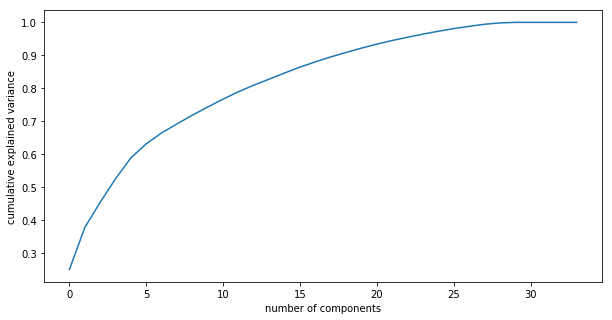

In [93]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#Here by observing the below curve we can say that around 4 Principle components can describe 95% of the data

In [94]:
#Using incremental PCA not needed as dataset is not so large - and choosing PCs as 4 as per above observation

pca_final = PCA(n_components=12)

In [95]:
# Final PCA dataset
df_pca = pca_final.fit_transform(dfcl)
df_pca.shape



(2333, 12)

In [96]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

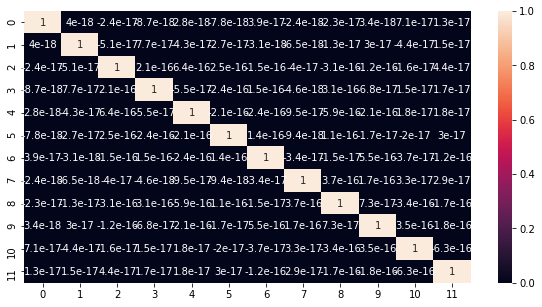

In [97]:
#plotting the correlation matrix - observe that there is very low / no correlation
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [98]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are very close to 0

max corr: 6.440100326794228e-16 , min corr:  -6.273383481765308e-16


In [99]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
dfcl.describe(percentiles=[.25,.5,.75,.90,.95,.99])
## we chose to leave the outlires as is as we dont want to miss out on the extreme cases

OP_10         OP_11         OP_13         OP_14          OP_8  \
count  2.333000e+03  2.333000e+03  2.333000e+03  2.333000e+03  2.333000e+03   
mean  -7.725877e-17  8.446832e-17  1.871866e-16 -5.503051e-16 -7.347554e-17   
std    1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00   
min   -9.690494e-01 -5.557080e-01 -3.853533e+00 -5.734853e+00 -1.143096e+00   
25%   -5.863891e-01 -5.355154e-01 -6.284803e-01 -6.615171e-01 -1.143096e+00   
50%   -3.080906e-01 -4.143597e-01 -1.108792e-01  9.408603e-02  4.751311e-01   
75%    1.789317e-01  7.026303e-02  6.456148e-01  7.417459e-01  8.527174e-01   
90%    1.094997e+00  1.055663e+00  1.561371e+00  1.281462e+00  1.145960e+00   
95%    2.011063e+00  1.976446e+00  1.561371e+00  1.281462e+00  1.308763e+00   
99%    4.363149e+00  4.197633e+00  1.561371e+00  1.281462e+00  1.568660e+00   
max    7.855331e+00  1.081273e+01  1.561371e+00  1.281462e+00  1.965862e+00   

       Efficiency_score   MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  \
count      2.333000e+03  2.333000e+03  2.333000e+03  2.333000e+03   
mean      -8.553904e-17 -2.458147e-16 -3.343518e-16 -6.718443e-16   
std        1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00   
min       -1.214353e+00 -2.666523e+00 -7.999447e-01 -6.444332e+00   
25%       -5.977008e-01  8.029143e-02 -7.999447e-01 -6.428628e-01   
50%       -2.475196e-01  2.948863e-01 -7.999447e-01 -8.655757e-02   
75%        2.659106e-01  4.880218e-01  9.322005e-01  5.492199e-01   
90%        1.155886e+00  6.811572e-01  1.440296e+00  1.264469e+00   
95%        1.916662e+00  8.099141e-01  1.682797e+00  1.773091e+00   
99%        3.989472e+00  1.003050e+00  2.317917e+00  2.694969e+00   
max        7.061599e+00  1.625375e+00  3.992324e+00  4.761245e+00   

         MORT_30_HF        ...         H_COMP_2_STAR_RATING  \
count  2.333000e+03        ...                 2.333000e+03   
mean  -5.606793e-16        ...                -4.685493e-16   
std    1.000214e+00        ...                 1.000214e+00   
min   -7.631051e+00        ...                -2.260513e+00   
25%   -6.538648e-01        ...                -1.146256e+00   
50%   -1.957516e-02        ...                -3.199965e-02   
75%    6.781435e-01        ...                 1.082257e+00   
90%    1.249004e+00        ...                 1.082257e+00   
95%    1.693007e+00        ...                 1.082257e+00   
99%    2.370428e+00        ...                 2.196514e+00   
max    3.659305e+00        ...                 2.196514e+00   

       H_COMP_3_STAR_RATING  H_COMP_4_STAR_RATING  H_COMP_5_STAR_RATING  \
count          2.333000e+03          2.333000e+03          2.333000e+03   
mean           1.044314e-15         -5.895175e-16         -9.669838e-17   
std            1.000214e+00          1.000214e+00          1.000214e+00   
min           -2.348035e+00         -2.909099e+00         -2.525503e+00   
25%           -1.245829e+00         -9.119242e-02         -1.217623e+00   
50%           -1.436223e-01         -9.119242e-02          9.025659e-02   
75%            9.585842e-01          1.317761e+00          9.025659e-02   
90%            9.585842e-01          1.317761e+00          1.398136e+00   
95%            9.585842e-01          1.317761e+00          1.398136e+00   
99%            2.060791e+00          1.317761e+00          1.398136e+00   
max            2.060791e+00          2.726714e+00          2.706016e+00   

       H_COMP_6_STAR_RATING  H_COMP_7_STAR_RATING  H_HSP_RATING_STAR_RATING  \
count          2.333000e+03          2.333000e+03              2.333000e+03   
mean          -2.513587e-15         -7.771085e-16             -4.193436e-16   
std            1.000214e+00          1.000214e+00              1.000214e+00   
min           -2.950162e+00         -1.686183e+00             -2.945543e+00   
25%           -4.038328e-01         -5.647847e-01             -4.846829e-01   
50%           -4.038328e-01         -5.647847e-01              7.457472e-01   
75%            8.693320e-

# K-Mean Clustering

In [100]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 5, max_iter=100)
model_clus4.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [105]:
df= df.reset_index()

In [107]:
# analysis of clusters formed
df_km = pd.concat([pd.DataFrame(df), pd.Series(model_clus4.labels_).rename('ClusterID')], axis=1)

df_km.head()

index  Provider ID   OP_10  OP_11  OP_13  OP_14    OP_8  Efficiency_score  \
0      0        10001  17.664  0.576 -0.284 -0.192  12.192            5.9912   
1      1        10005  36.708  6.528 -0.212 -0.320  13.696           11.2800   
2      2        10006  32.568  2.944 -0.000 -0.368  14.592            9.9472   
3      5        10011   6.624  6.656 -0.000 -0.272  11.584            4.9184   
4      6        10012  16.836  6.912 -0.124 -0.000   0.000            4.7248   

   MORT_30_AMI  MORT_30_CABG    ...      H_COMP_4_STAR_RATING  \
0      132.000         32.34    ...                     44.22   
1      168.960          0.00    ...                     44.22   
2      176.352         31.57    ...                     44.22   
3      146.784         28.49    ...                     44.22   
4      177.408          0.00    ...                     44.22   

   H_COMP_5_STAR_RATING  H_COMP_6_STAR_RATING  H_COMP_7_STAR_RATING  \
0                 45.54                 38.28                 50.82   
1                 45.54                 51.04                 33.88   
2                 45.54                 25.52                 33.88   
3                 30.36                 38.28                 33.88   
4                 45.54                 51.04                 33.88   

   H_HSP_RATING_STAR_RATING  H_QUIET_STAR_RATING  H_RECMND_STAR_RATING  \
0                     68.64                51.04                 65.12   
1                     68.64                51.04                 48.84   
2                     34.32                51.04                 32.56   
3                     51.48                38.28                 48.84   
4                     68.64                51.04                 32.56   

   Patent_exp_score  Hospital overall rating  ClusterID  
0             46.56                      3.0          4  
1             47.32                      3.0          3  
2             40.40                      2.0          4  
3             38.14                      2.0          4  
4             47.32                      3.0          3  

[5 rows x 38 columns]

In [108]:
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 38 columns):
index                       2333 non-null int64
Provider ID                 2333 non-null int64
OP_10                       2333 non-null float64
OP_11                       2333 non-null float64
OP_13                       2333 non-null float64
OP_14                       2333 non-null float64
OP_8                        2333 non-null float64
Efficiency_score            2333 non-null float64
MORT_30_AMI                 2333 non-null float64
MORT_30_CABG                2333 non-null float64
MORT_30_COPD                2333 non-null float64
MORT_30_HF                  2333 non-null float64
MORT_30_PN                  2333 non-null float64
MORT_30_STK                 2333 non-null float64
Mort_score                  2333 non-null float64
READM_30_AMI                2333 non-null float64
READM_30_CABG               2333 non-null float64
READM_30_COPD               2333 non-null float

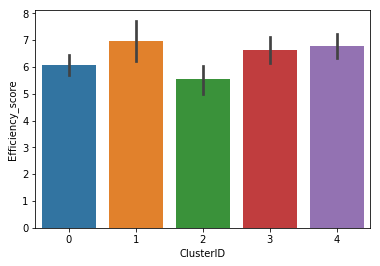

In [111]:
# plotting the data for mean values 
sns.barplot(x=df_km.ClusterID, y=df_km.Efficiency_score)

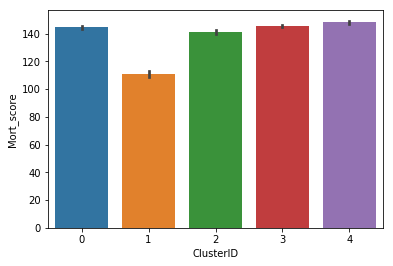

In [112]:
# plotting the data for mean values 
sns.barplot(x=df_km.ClusterID, y=df_km.Mort_score)

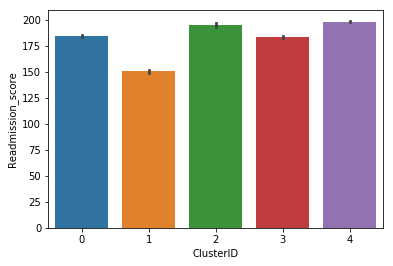

In [113]:
# plotting the data for mean values 
sns.barplot(x=df_km.ClusterID, y=df_km.Readmission_score)

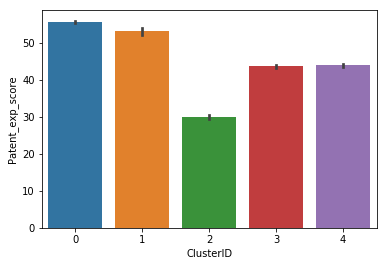

In [114]:
# plotting the data for mean values 
sns.barplot(x=df_km.ClusterID, y=df_km.Patent_exp_score)